`This notebook created and edited firstly by Yiğit Can Akçay`

>IMPORTANT MESSAGE: Markdown blocks were organized to be related to its below code block(s).

# Introduction and Dataset Information

In the rapidly evolving automotive industry, understanding market trends and vehicle sales dynamics is crucial for manufacturers, dealers, and consumers. The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.

This notebook aims to explore and analyze this dataset to uncover valuable insights into vehicle sales patterns and market trends. By performing exploratory data analysis (EDA), data cleaning, preprocessing, and visualization, it is aimed to identify key factors influencing vehicle prices, detect outliers, and understand the distribution of various attributes. Additionally, feature engineering and selection techniques will be applied to enhance the dataset's utility for machine learning models, ultimately aiding in predictive analytics and decision-making processes.

The analysis will cover various aspects, including the impact of vehicle attributes on selling prices, the prevalence of different car makes and models, and the relationship between vehicle condition and market value. Through this comprehensive analysis, This study is sought to provide a deeper understanding of the automotive market, enabling stakeholders to make informed decisions based on data-driven insights.

![Vehicle Sales Analysis](https://storage.googleapis.com/kaggle-datasets-images/4476093/7673611/54c7e23d0997f6489d364e084b45a1df/dataset-cover.jpg?t=2024-02-21-20-22-07)

# Exploratory Data Analysis - EDA

In [ ]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
import warnings
warnings.filterwarnings('ignore')  # To ignore warnings

In [72]:
# Load dataset
df = pd.read_csv('car_prices.csv')

>First, let us have quick look to the data.

In [73]:
# The first 5 rows of the dataset
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [74]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
# Check the size of the dataset
print("Size of the dataset:", df.shape)
print(f'Number of rows: {df.shape[0]}, number of columns: {df.shape[1]}')

Size of the dataset: (558837, 16)
Number of rows: 558837, number of columns: 16


>`Vehicle Details`: Includes specific information about each vehicle, such as its make, model, trim, and manufacturing year.
>
>`Transaction Information`: Provides insights into the sales transactions, including selling prices and sale dates.
>
>`Market Trends`: MMR values offer an estimate of the market value of each vehicle, allowing for analysis of market trends and fluctuations.
>
>`Condition and Mileage`: Contains data on the condition of the vehicles as well as their odometer readings, enabling analysis of how these factors influence selling prices.

In [ ]:
# Check the names of the columns
print("Column names:", list(df.columns))

Column names: ['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate']


**Numeric columns:**

- `year`: Integer type (int64) - represents the manufacturing year
- `condition, odometer, mmr, sellingprice`: Floating point (float64)
    - condition: likely a numeric rating
    - odometer: mileage reading
    - mmr: Manheim Market Report value
    - sellingprice: final sale price

**Categorical/Text columns (object type):**
- `make:` Vehicle manufacturer
- `model`: Vehicle model name
- `trim`: Trim level
- `body`: Body style
- `transmission`: Transmission type
- `vin`: Vehicle Identification Number
- `state`: Location state
- `color`: Exterior color
- `interior`: Interior color/material
- `seller`: Seller information
- `saledate`: Date of sale (stored as text)
>Car sales dataset consist of with both numerical features and categorical features.

In [ ]:
# Check the data types of the columns
print("Data types:")
print(df.dtypes)

Data types:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


In [78]:
# Find numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Find categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
Categorical columns: ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']


In [79]:
# Generates descriptive statistics, include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


In [80]:
# More statistical information about the numerical columns
def give_stats(dataframe):
    """Prints statistical information for numerical columns.
    Args:
        dataframe (pd.DataFrame): DataFrame object.
    Return:
        None
    """
    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [81]:
give_stats(df)

**********year**********
Mean value of year is 2010.04
Std value of year is 3.97
Max value of year is 2015
Min value of year is 1982
Count value of year is 558837
Median value of year is 2012.0

**********condition**********
Mean value of condition is 30.67
Std value of condition is 13.40
Max value of condition is 49.0
Min value of condition is 1.0
Count value of condition is 547017
Median value of condition is 35.0

**********odometer**********
Mean value of odometer is 68320.02
Std value of odometer is 53398.54
Max value of odometer is 999999.0
Min value of odometer is 1.0
Count value of odometer is 558743
Median value of odometer is 52254.0

**********mmr**********
Mean value of mmr is 13769.38
Std value of mmr is 9679.97
Max value of mmr is 182000.0
Min value of mmr is 25.0
Count value of mmr is 558799
Median value of mmr is 12250.0

**********sellingprice**********
Mean value of sellingprice is 13611.36
Std value of sellingprice is 9749.50
Max value of sellingprice is 230000.0
Min

# Data Cleaning, Preprocessing and Visualization

In [82]:
# Check missing values
print("Missing values based on attributes:")
print(df.isnull().sum())

print("\nMissing values total:")
print(df.isnull().sum().sum())

Missing values based on attributes:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

Missing values total:
123376


In [83]:
# The percentage of missing values for each column
missing_percentage = round(df.isnull().sum() / len(df) * 100, 3)
print("Percentage of missing values:")
print(missing_percentage)

Percentage of missing values:
year             0.000
make             1.843
model            1.861
trim             1.906
body             2.361
transmission    11.694
vin              0.001
state            0.000
condition        2.115
odometer         0.017
color            0.134
interior         0.134
seller           0.000
mmr              0.007
sellingprice     0.002
saledate         0.002
dtype: float64


### Adding Missing Values on Purpose

>The total of missing value to be added is supposed to be 89413. But some of the indices were already NaN so these cases did not increase the total. (89413-87764=1649 times)

In [84]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# There will bee added 1% missing values to the dataset
num_missing = int(df.size * 0.01)

# Randomly select indices to set as NaN
nan_indices = (np.random.randint(0, df.shape[0], num_missing), np.random.randint(0, df.shape[1], num_missing))

nan_indices = [(x, y) for x, y in zip(nan_indices[0], nan_indices[1])]

# Copy the dataset so the original dataset will not be affected
df_ = df.copy()

# Set the selected indices as NaN
for x, y in nan_indices:
    df_.iat[x, y] = np.nan

# Verify missing values
print("Number of missing values to be added:", num_missing)
print("Missing values after adding NaNs:", df_.isnull().sum().sum() - df.isnull().sum().sum())
print("Total missing values after adding NaNs:", df_.isnull().sum().sum())
print(df_.isnull().sum())

Number of missing values to be added: 89413
Missing values after adding NaNs: 87764
Total missing values after adding NaNs: 211140
year             5658
make            15774
model           15782
trim            16129
body            18698
transmission    70153
vin              5603
state            5566
condition       17114
odometer         5692
color            6373
interior         6351
seller           5575
mmr              5539
sellingprice     5492
saledate         5641
dtype: int64


### Visualization of Missing Data

In [85]:
# Install missingno package
%pip install missingno


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


`msno.bar` calculates the percentage of non-null values for each column. Creates a bar chart where:
- Each bar represents a column in DataFrame
- Height shows the proportion of complete (non-null) values
- Additional axes show actual counts of complete values

>In the output it can be said that transmission attribute has the most missing values.

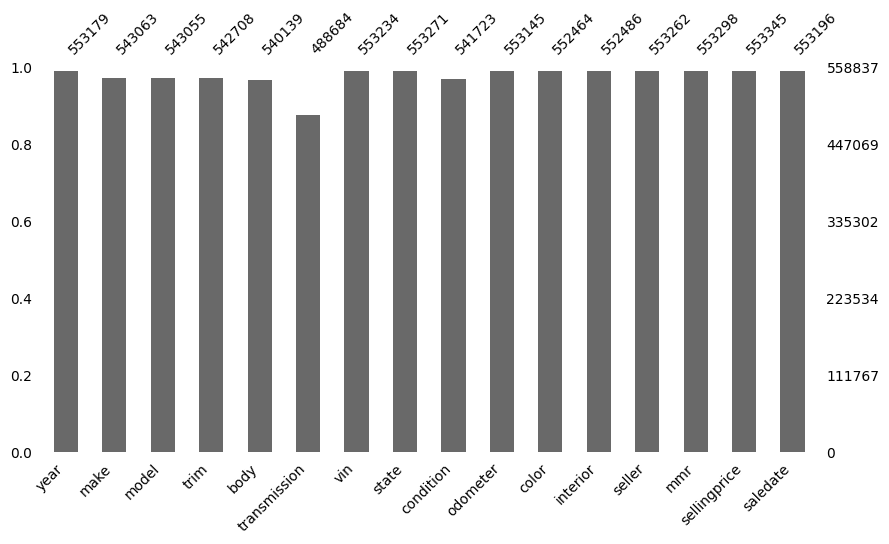

In [86]:
import missingno as msno

msno.bar(df = df_,
         figsize = (10, 5),
         fontsize = 10);

>From the output of the matrix we can catch a relation between make, model, trim and body attributes. This means if any of these attributes is missing then the others tend to do so.

<Axes: >

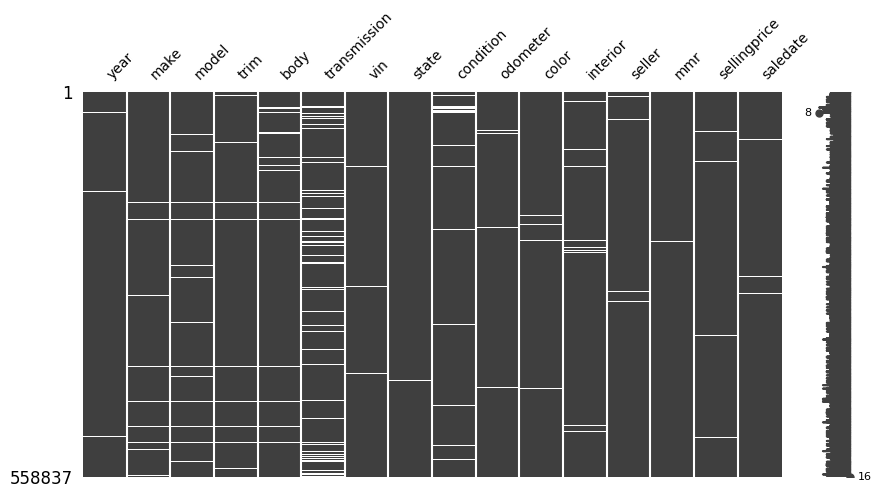

In [87]:
msno.matrix(df_, figsize=(10, 5), fontsize=10)

> Heatmap tells us that a few of attributes are corrolated together. We can say that most of the attributes do not affect each other.

<Axes: >

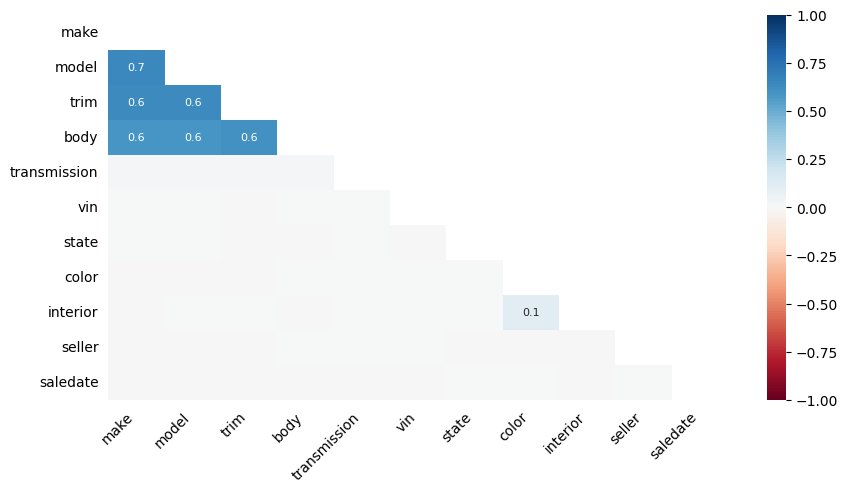

In [88]:
msno.heatmap(df_[categorical_columns], figsize=(10, 5), fontsize=10)

`msno.dendrogram` 
- Shows a tree-like structure (dendrogram)
- Columns that tend to have missing values together are clustered closer
- The height of connections indicates the strength of relationship
- More closely related columns are connected at lower heights

<Axes: >

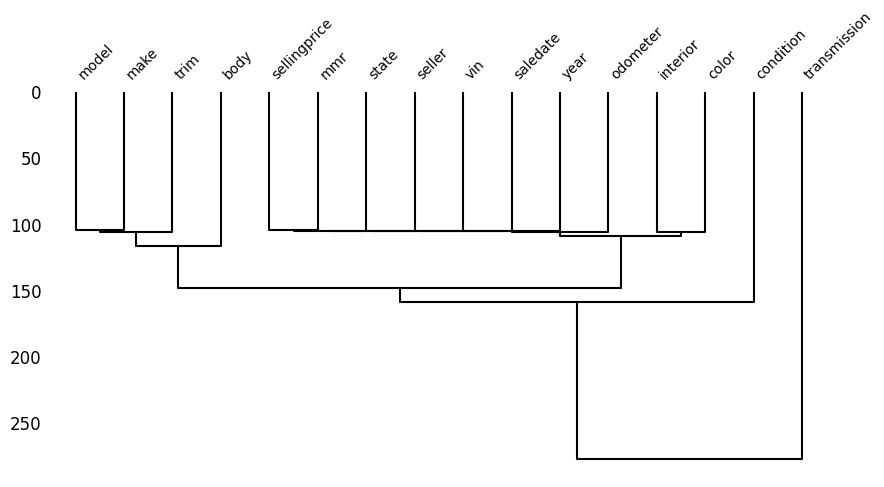

In [89]:
msno.dendrogram(df_, figsize=(10, 5), fontsize=10)

### Filling Missing Values

>There are several ways to handle missing values. As a method of handling missing values filling with mean value by grouping for numerical attributes and filling with mode value for categorical attributes was selected.
>
>Even if numerical attributes were filled with mean value by grouping for  there were still some missing values. To deal with it remaining NaN values were removed from the dataset. This descision was made because the remaining NaN total was a small number so there should be no significant effect to data distribution by removing those.

In [90]:
df_filled = df_.copy()

# Filling missing values for numerical columns with mean usign groupby
for col in numerical_columns:
    # df_filled.fillna({col: df_filled[col].mean()}, inplace=True)
    df_filled.fillna(value = {col: df_filled.groupby("make")[col].transform("mean")},
                                       inplace = True)

# Filling missing values for categorical columns with mode
for col in categorical_columns:
    df_filled.fillna(value = {col: df_filled[col].mode().iloc[0]}, inplace = True)

# Dropping rows with missing values
df_filled.dropna(inplace=True)

# Verify if there are any remaining missing values
print("Remaining missing values after filling:")
print(df_filled.isnull().sum())
print("\nTotal missing values after filling:", df_filled.isnull().sum().sum())
print("Number of rows after filling:", df_filled.shape[0])

Remaining missing values after filling:
year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

Total missing values after filling: 0
Number of rows after filling: 557894


In [91]:
# Descriptive statistics of the filled dataset (includes no missing values)
df_filled.describe().T

,count,mean,std,min,25%,50%,75%,max
year,557894.0,2010.044713,3.944100,1982.0,2008.0,2012.0,2013.0,2015.0
condition,557894.0,30.660869,13.209047,1.0,24.0,34.0,41.0,49.0
odometer,557894.0,68263.539417,53118.731421,1.0,28577.0,52717.5,98559.0,999999.0
mmr,557894.0,13775.397281,9640.921508,25.0,7175.0,12250.0,18300.0,182000.0
sellingprice,557894.0,13619.992599,9714.393943,1.0,7000.0,12100.0,18200.0,230000.0


### More Information About Data Distribution

In [92]:
for col in categorical_columns:
    print(f'There are {df_filled[col].nunique()} unique values in "{col}" categorical feature.')

There are 92 unique values in "make" categorical feature.
There are 972 unique values in "model" categorical feature.
There are 1961 unique values in "trim" categorical feature.
There are 87 unique values in "body" categorical feature.
There are 4 unique values in "transmission" categorical feature.
There are 543953 unique values in "vin" categorical feature.
There are 64 unique values in "state" categorical feature.
There are 46 unique values in "color" categorical feature.
There are 17 unique values in "interior" categorical feature.
There are 14186 unique values in "seller" categorical feature.
There are 3755 unique values in "saledate" categorical feature.


>There are plots down there for some categorical attributes. Each bar plot tells a lot of information about each attribute. Such as Ford is the most common car brand in the dataset.
>
>When plotting it was realized that there are may lots of unique classes to plot. So it was dediced to limit it by 10 bars.

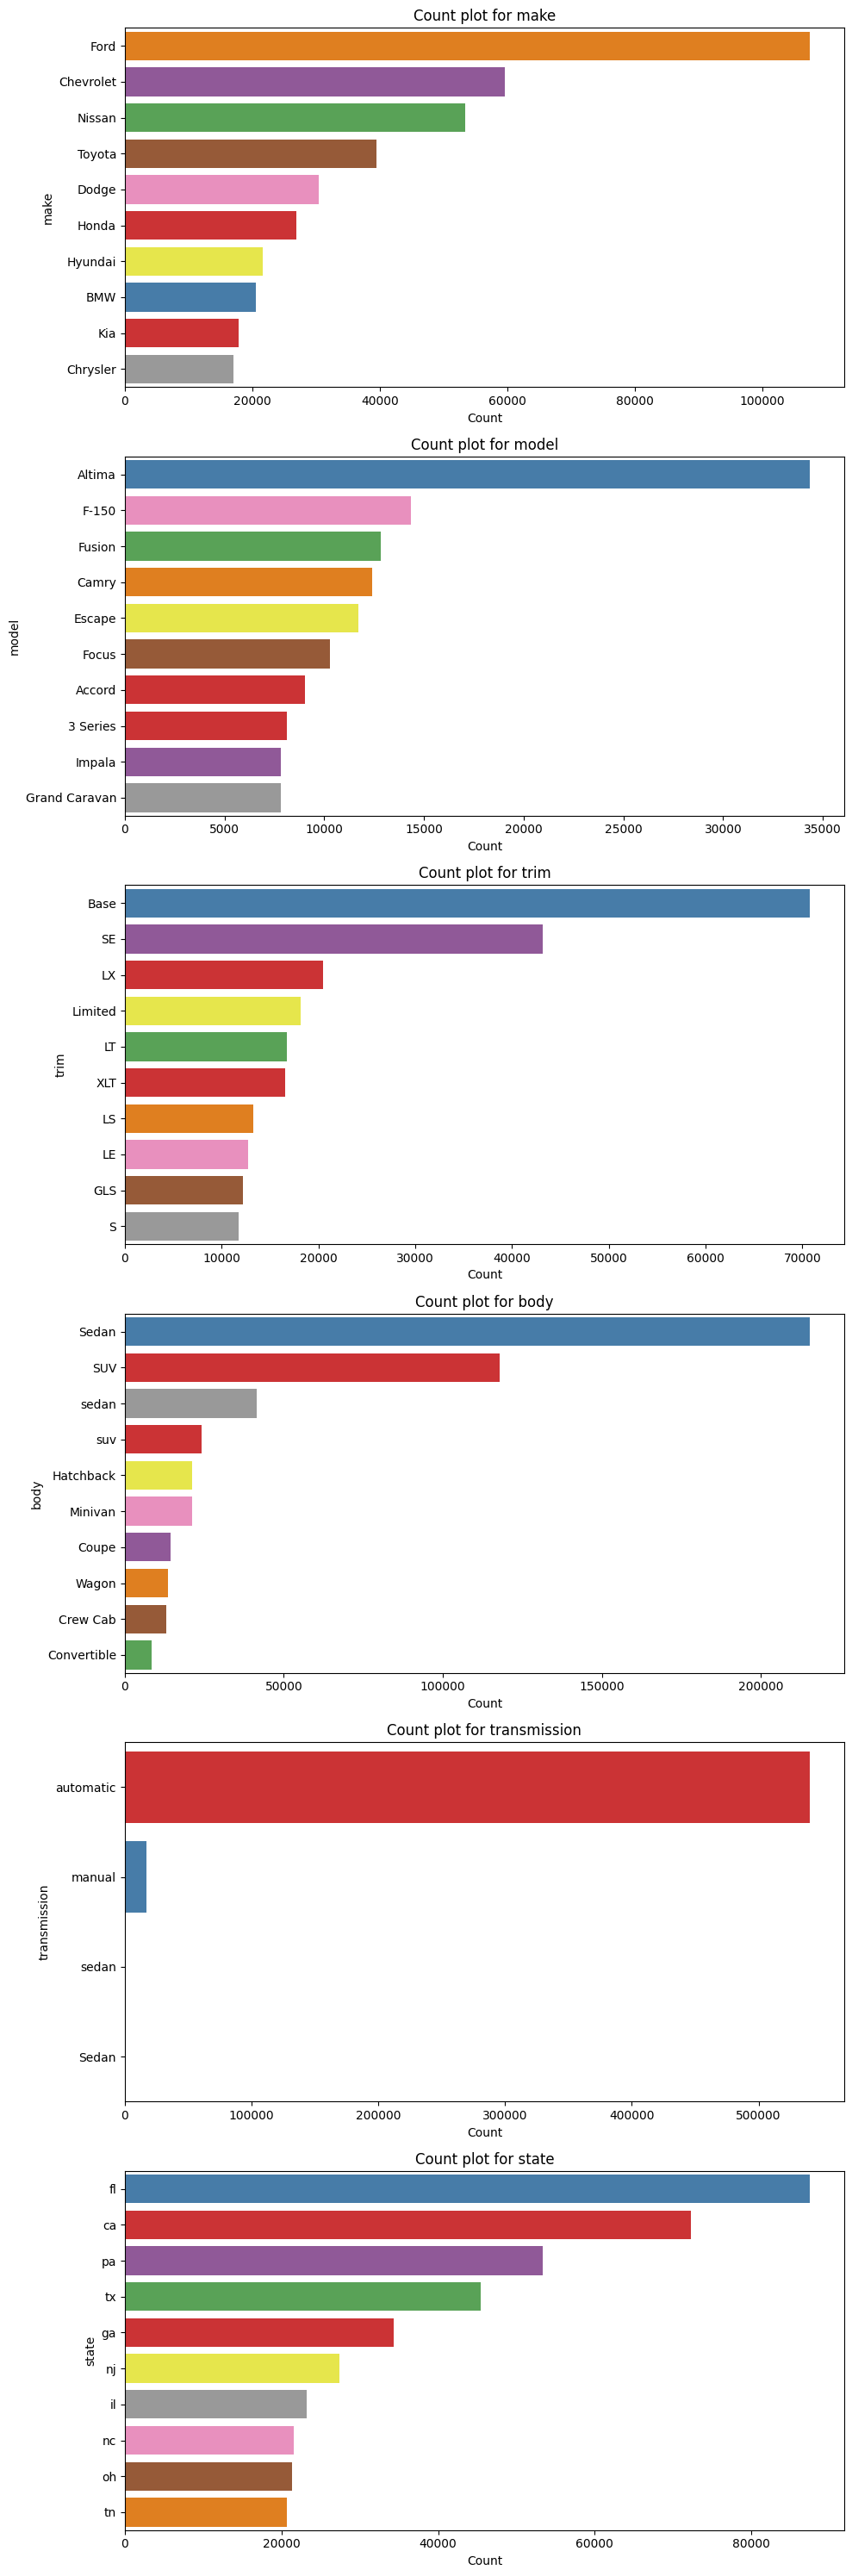

In [93]:
# Plot bar plots for categorical columns showing only the 5 largest categories
selected_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state']
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(10, len(selected_columns) * 5))

for i, col in enumerate(selected_columns):
    top_categories = df_filled[col].value_counts().nlargest(10).index
    sns.countplot(data=df_filled[df_filled[col].isin(top_categories)], 
                  y=col, 
                  ax=axes[i], 
                  order=top_categories,
                  hue=col,
                  palette="Set1",
                  orient='h')
    axes[i].set_title(f'Count plot for {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

>Limited to top 5 categories to avoid clutter
>
>Uses percentages instead of raw counts
>
>Includes clear labels and percentages
>
>Uses contrasting colors from seaborn
>
>Square figure size ensures circular appearance

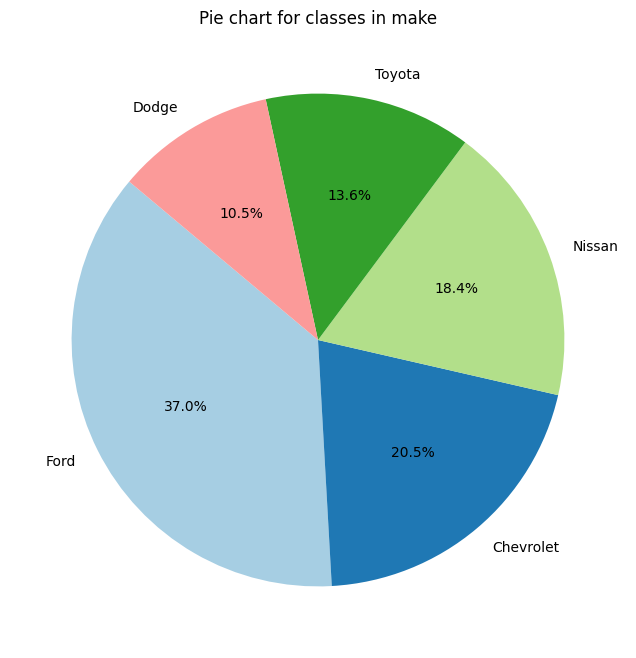

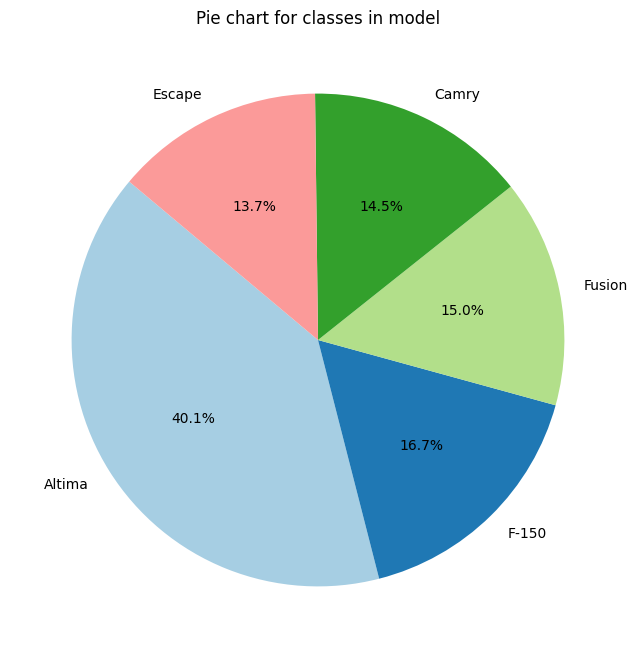

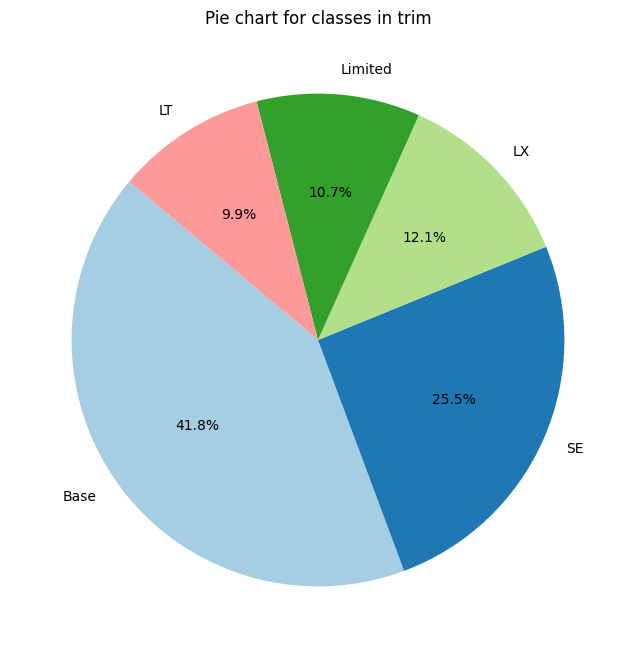

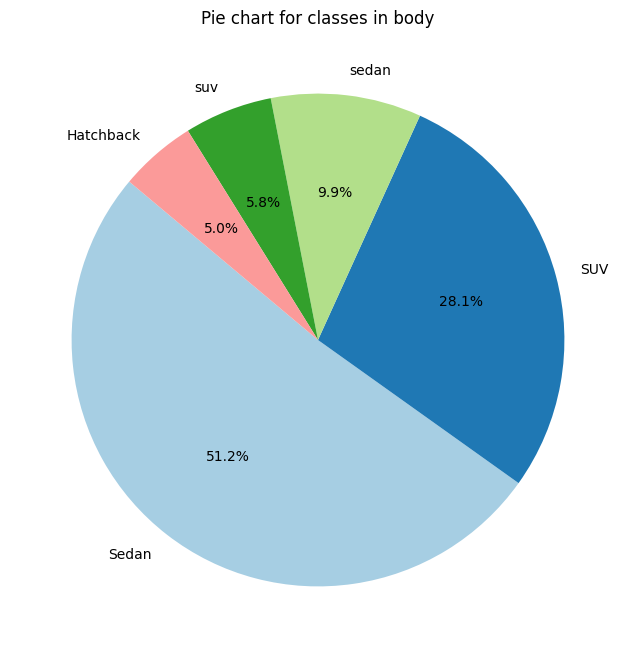

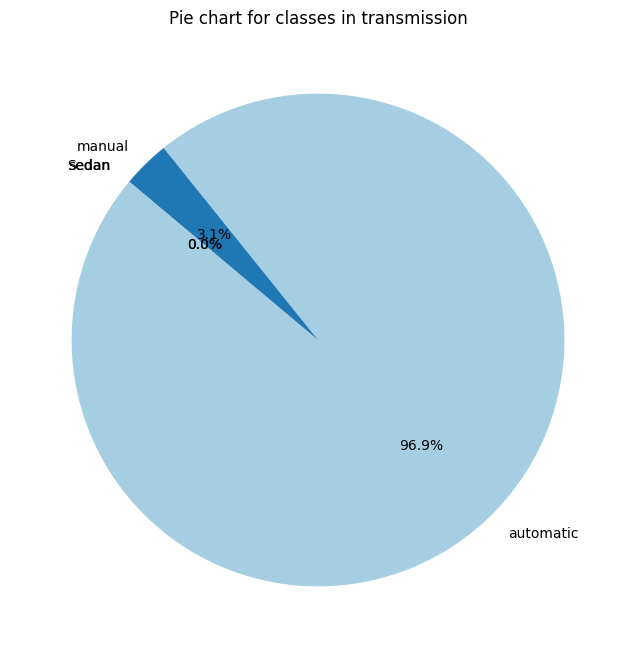

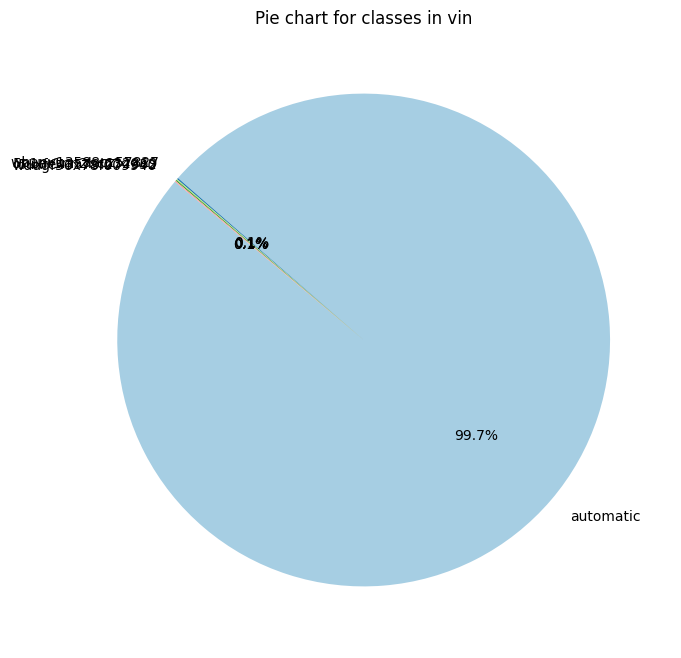

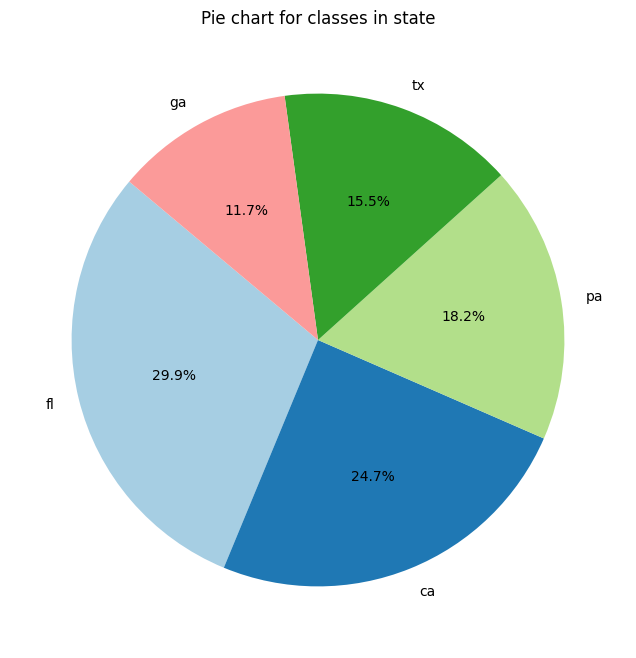

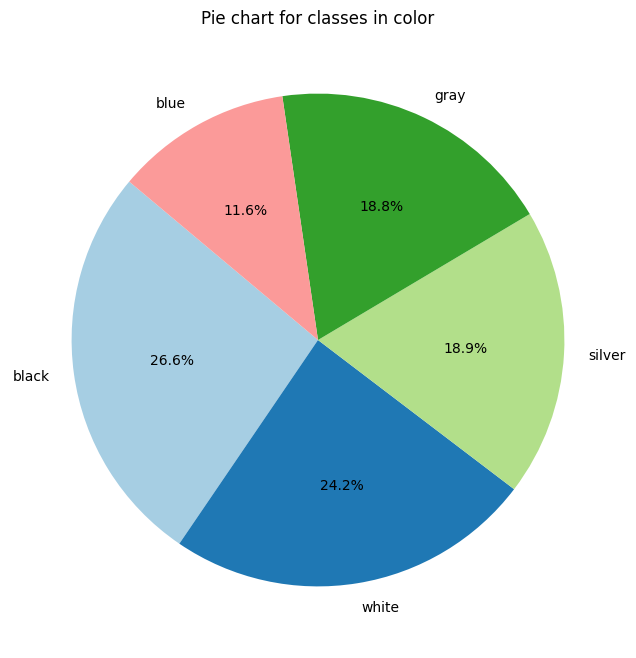

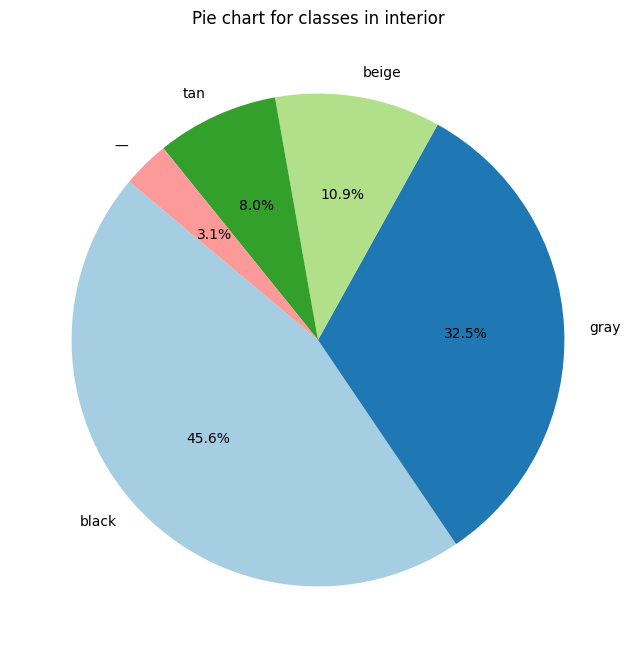

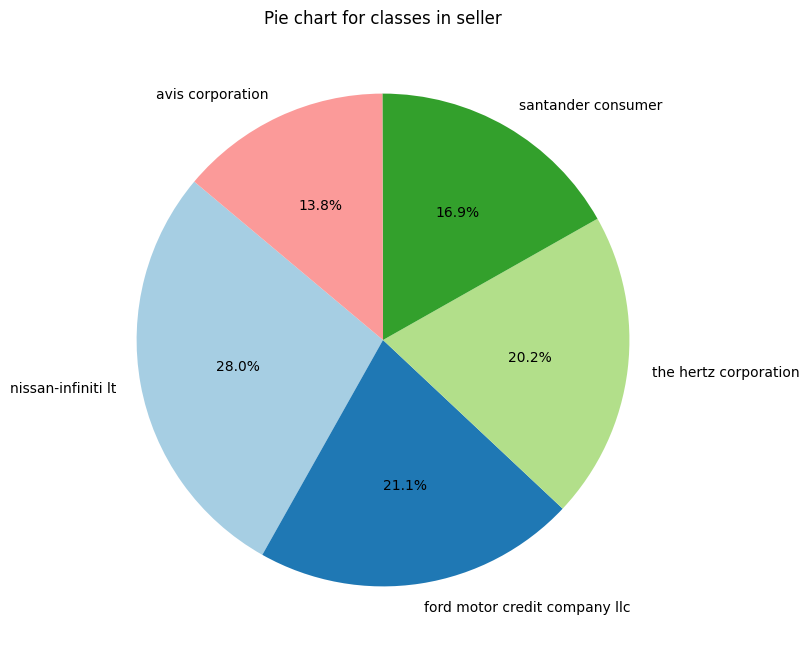

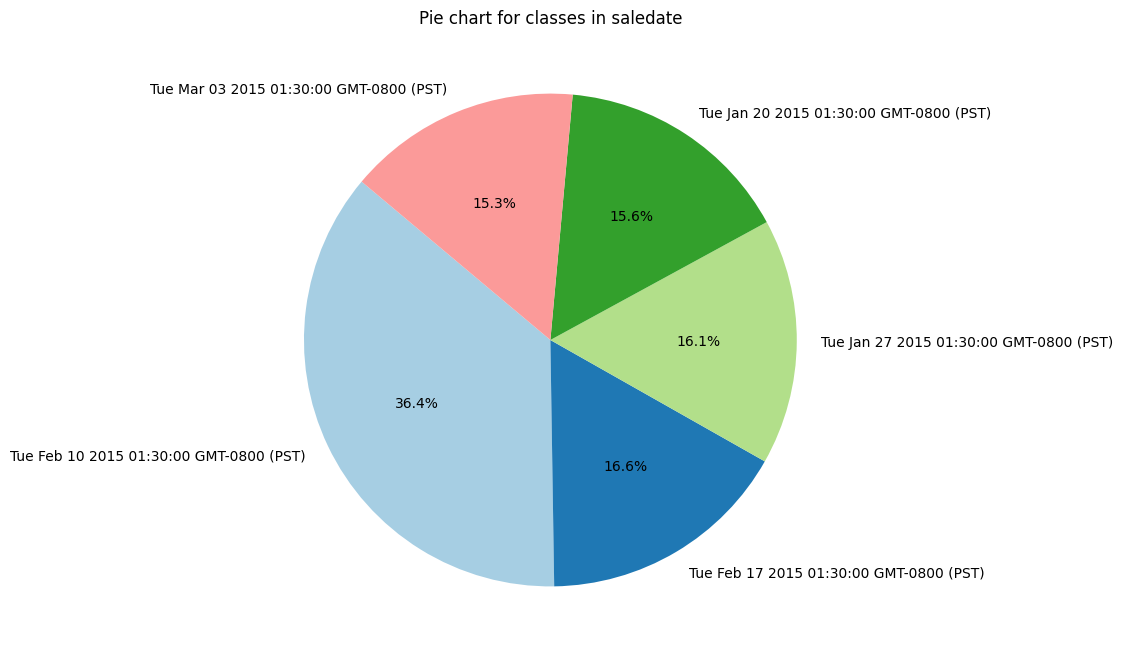

In [94]:
for col in categorical_columns:
    # Select the top 5 categories for the specified column
    top_categories = df_filled[col].value_counts().nlargest(5)

    # Calculate the percentage of each category
    top_categories_percentage = top_categories / top_categories.sum() * 100

    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(top_categories_percentage, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired"))
    plt.title(f'Pie chart for classes in {col}')
    plt.show()

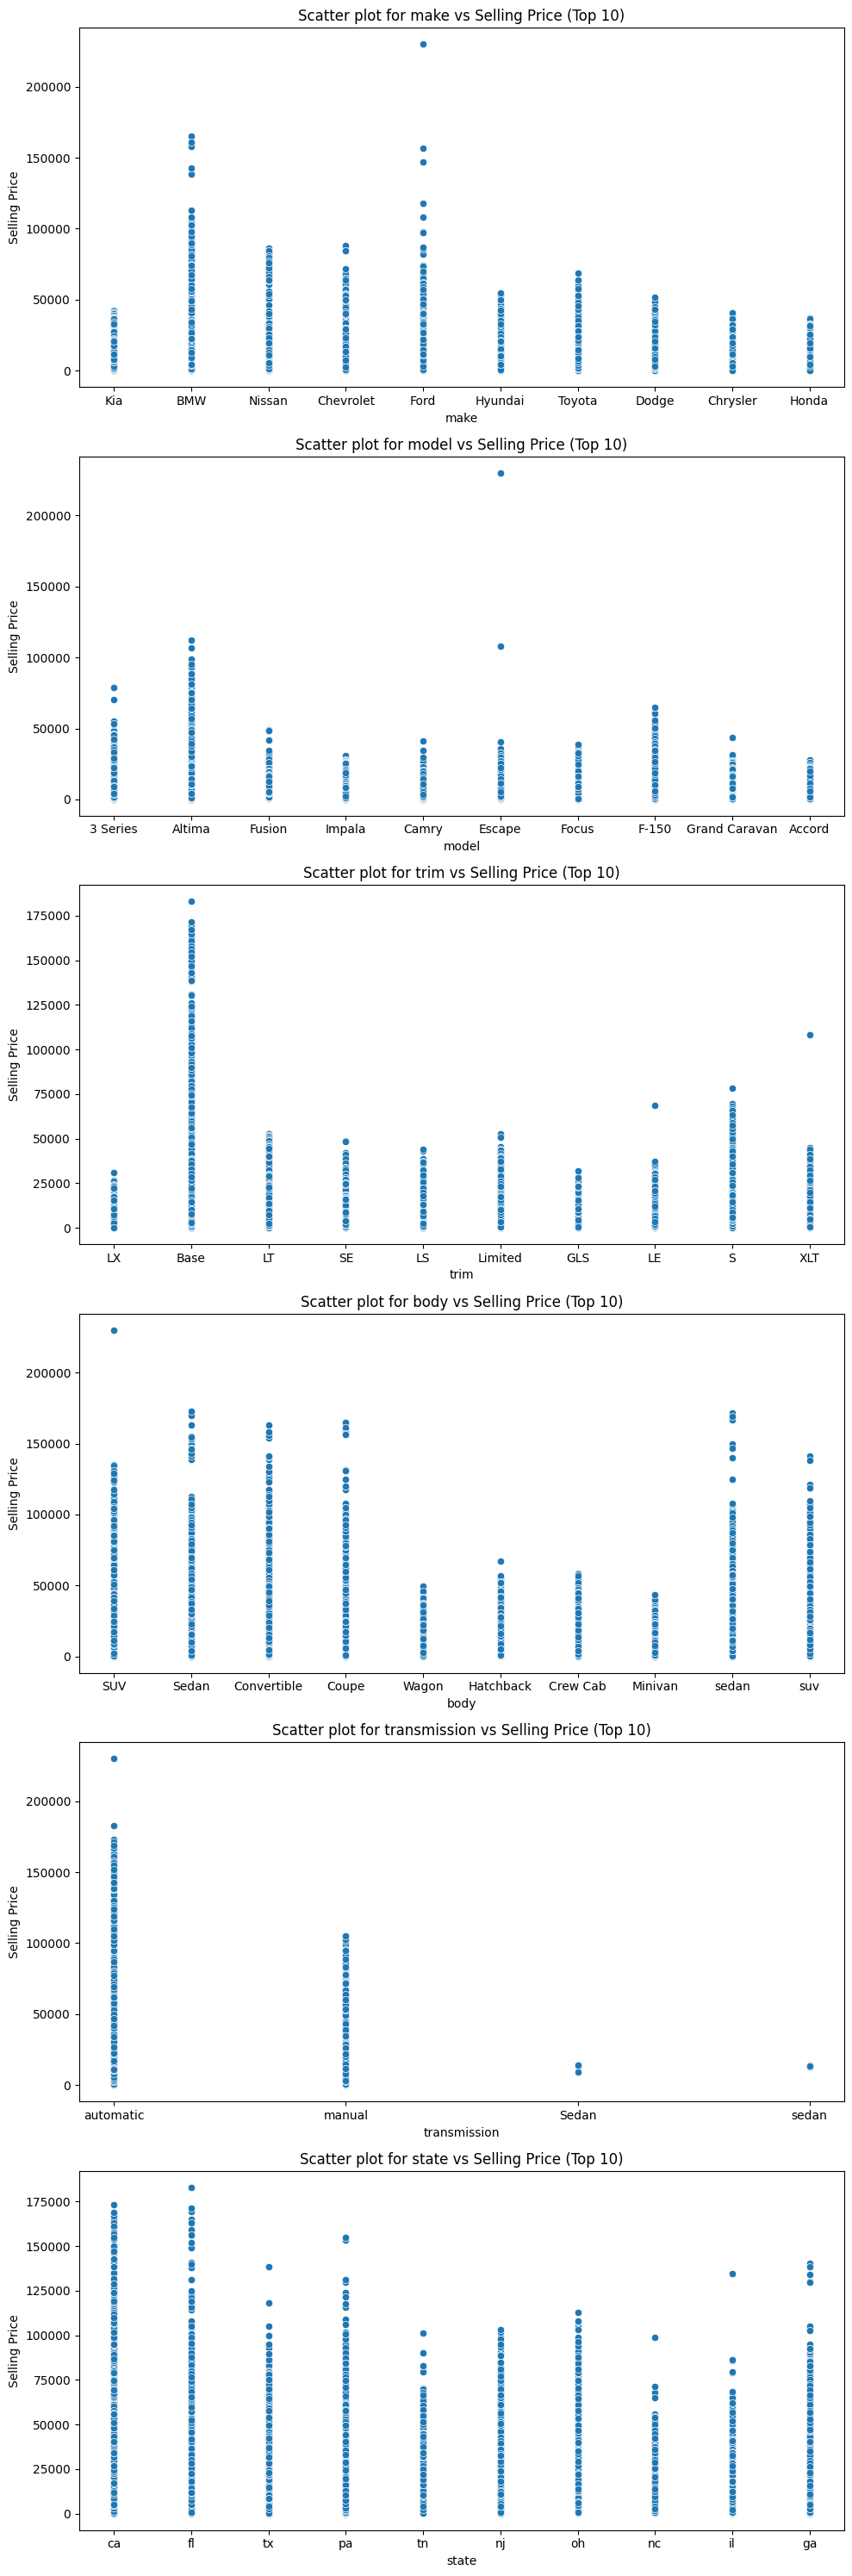

In [95]:
# Create a figure with multiple subplots - one for each column in selected_columns
# Figure size is 10 units wide and 5 units tall per subplot
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(10, len(selected_columns) * 5))

for i, col in enumerate(selected_columns):
    # Get the 10 most frequent values in the current column
    top_categories = df_filled[col].value_counts().nlargest(10).index
    
    # Create scatter plot showing relationship between current column and selling price
    # Only include data points from top 10 most frequent categories
    sns.scatterplot(data=df_filled[df_filled[col].isin(top_categories)], 
                    x=col, y='sellingprice', ax=axes[i])
    
    # Set title and labels for current subplot
    # Title shows which column is being plotted against selling price
    axes[i].set_title(f'Scatter plot for {col} vs Selling Price (Top 10)')
    axes[i].set_xlabel(col)  # X-axis label is current column name
    axes[i].set_ylabel('Selling Price')  # Y-axis label is selling price

# Adjust spacing between subplots to prevent overlap
plt.tight_layout()

# Display all scatter plots
# Output shows:
# - Distribution of selling prices for each category
# - Any potential relationships between features and price
# - Outliers in pricing for specific categories
plt.show()

>The resulting plot shows:
>- Bars grouped by car makes for the 20 most expensive cars
>- Each make's bars are split by interior type
>- Height of bars represents selling price
>- Different colors represent different interior types
>- Allows comparison of:
>    - Which makes have highest-priced vehicles
>    - How interior types affect pricing within each make
>    - Distribution of luxury vehicles across makes
>
>Error bars are graphical representations of the variability of data and used on graphs to indicate the error or uncertainty in a reported measurement.

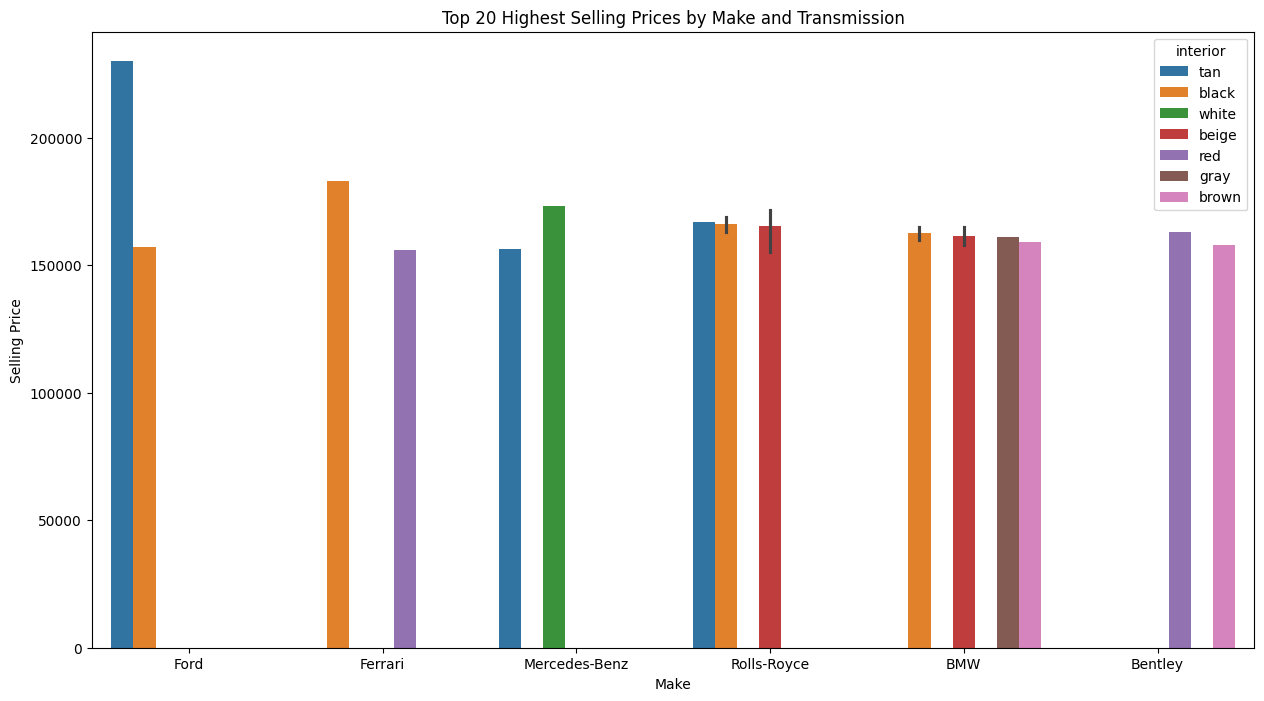

In [96]:
# Select the top 10 rows with the highest selling prices
top_10_highest_price = df_filled.nlargest(20, 'sellingprice')

plt.figure(figsize=(15, 8))
sns.barplot(data=top_10_highest_price,
            x="make",
            y="sellingprice",
            hue="interior")
plt.title('Top 20 Highest Selling Prices by Make and Transmission')
plt.xlabel('Make')
plt.ylabel('Selling Price')
plt.show()

>Here the output gives the list of most expensive 10 car models of each make. The most expensive car apperently is Ford Escape. This raises a doubt. Maybe this instance is a outlier, who knows?

In [97]:
# Find the most expensive model for each make
most_expensive_models = df_filled.loc[df_filled.groupby('make')['sellingprice'].idxmax()]

# Select relevant columns to display
most_expensive_models = most_expensive_models[['make', 'model', 'sellingprice']]

# Sort the dataframe by selling price in ascending order
most_expensive_models = most_expensive_models.sort_values(by='sellingprice', ascending=False)[:10]

print(most_expensive_models.reset_index(drop=True))

most_expensive_makes = most_expensive_models.reset_index(drop=True)["make"].tolist()
print(most_expensive_makes)

            make            model  sellingprice
0           Ford           Escape      230000.0
1        Ferrari       458 Italia      183000.0
2  Mercedes-Benz          S-Class      173000.0
3    Rolls-Royce            Ghost      171500.0
4            BMW               i8      165000.0
5        Bentley  Continental GTC      163000.0
6        Porsche              911      152000.0
7     Land Rover      Range Rover      135000.0
8           Audi               R8      120000.0
9    Lamborghini         Gallardo      117500.0
['Ford', 'Ferrari', 'Mercedes-Benz', 'Rolls-Royce', 'BMW', 'Bentley', 'Porsche', 'Land Rover', 'Audi', 'Lamborghini']


>The most occurred body type for each 10 most expensive make.

In [98]:
# Filter the dataframe to include only the most expensive makes
filtered_df = df_filled[df_filled['make'].isin(most_expensive_makes)]

# Find the most occurred body type for each make
most_occurred_body = filtered_df.groupby('make')['body'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Rename the columns for better understanding
most_occurred_body.columns = ['Make', 'Body']

print(most_occurred_body)

            Make         Body
0           Audi        Sedan
1            BMW        Sedan
2        Bentley        Coupe
3        Ferrari  Convertible
4           Ford        Sedan
5    Lamborghini  Convertible
6     Land Rover          SUV
7  Mercedes-Benz        Sedan
8        Porsche          SUV
9    Rolls-Royce        Sedan


>This visualization focuses specifically on high-end car manufacturers (Audi, BMW, Ferrari, Porsche and Mercedes-Benz) and how interior types affect their prices.

<Axes: xlabel='make', ylabel='sellingprice'>

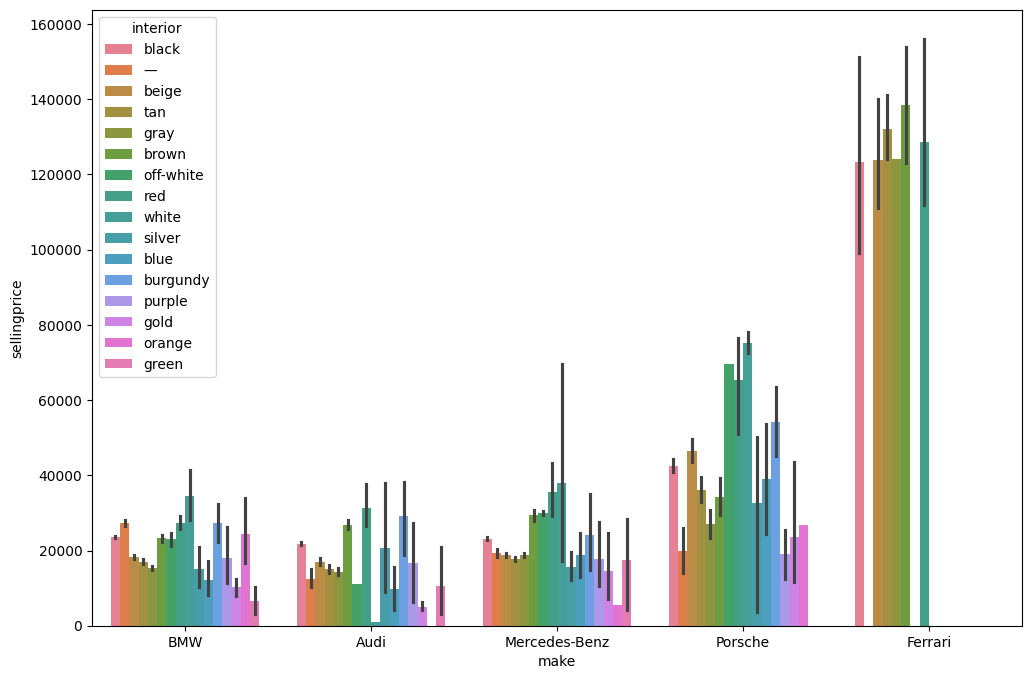

In [99]:
plt.figure(figsize = (12, 8))
sns.barplot(data = df_filled[df_filled['make'].isin(["Audi", "BMW", "Ferrari", "Porsche", "Mercedes-Benz"])], x = "make", y = "sellingprice", hue = "interior")

>To see clearly the distriburion of the numerical data, histogram plots helps a lot. In our data year has left skewed distribution. Odometer, mmr and sellingprice have right skewed distribution. Condition has a mixed type distribution.

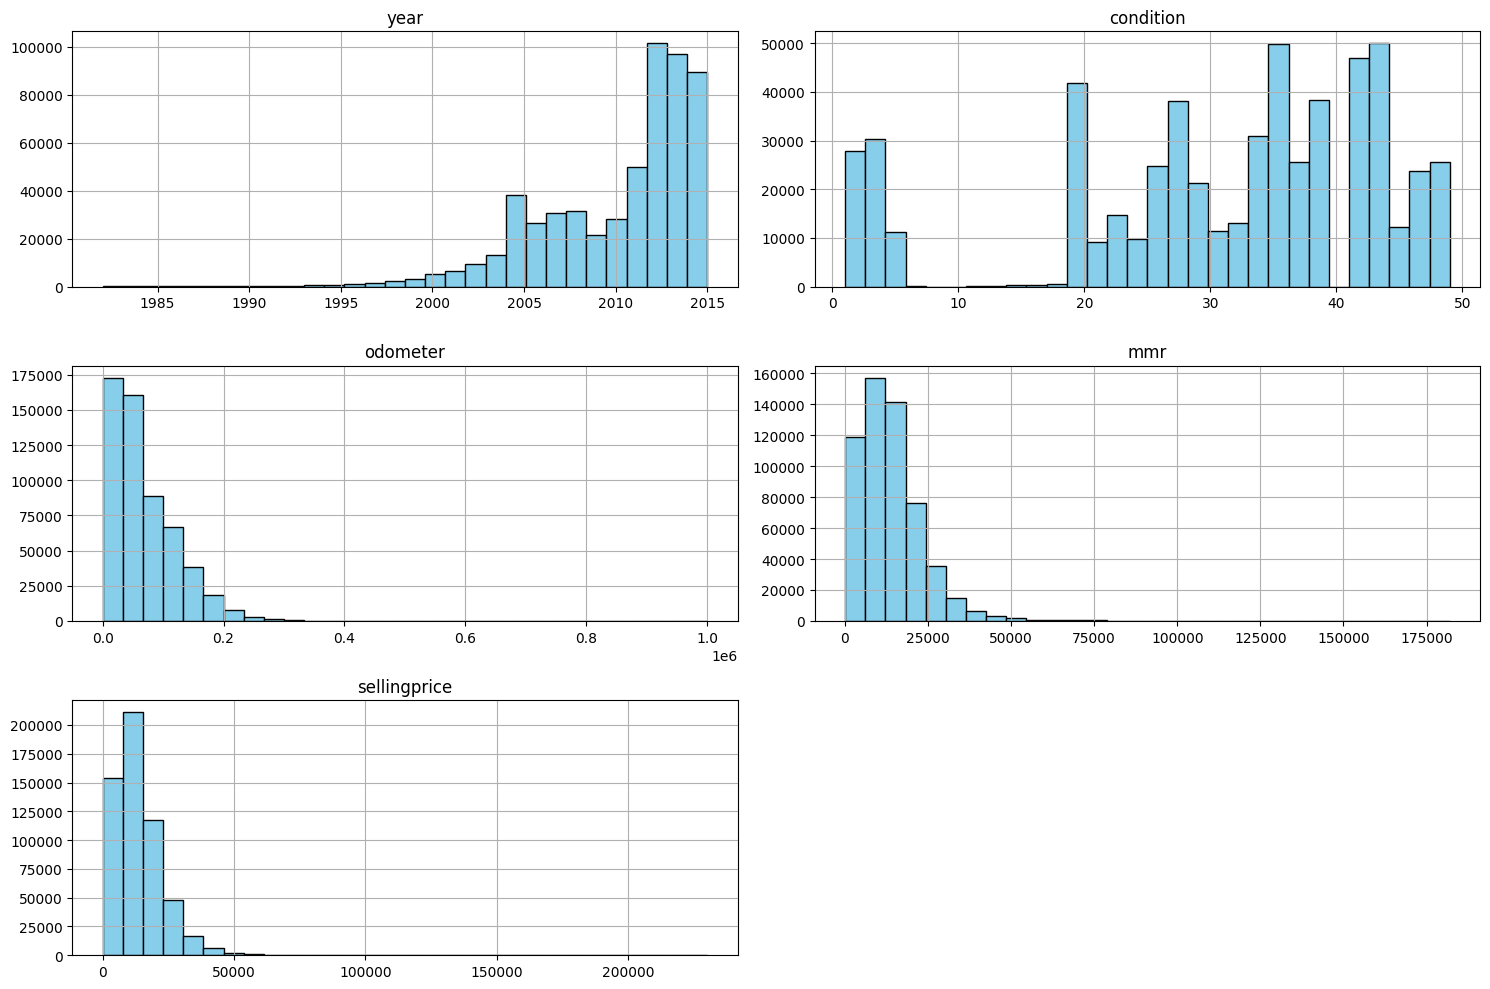

In [100]:
# Plot histograms for numerical columns
df_filled[numerical_columns].hist(bins=30, figsize=(15, 10), layout=(3, 2), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

>It can be seen from this plot that cars have black interior are tend to be more expensive in the market. 

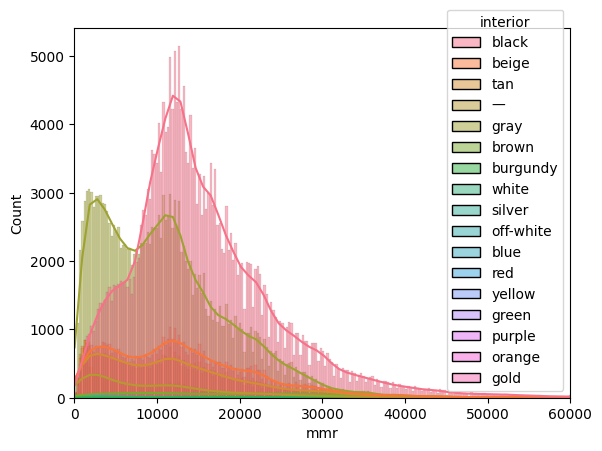

In [101]:
sns.histplot(data=df, x="mmr", kde=True, hue="interior")
plt.xlim(0, 60000)
plt.show()

>According to this plot, cars have off-white interior occupies a huge ammount of numbers around $30000.

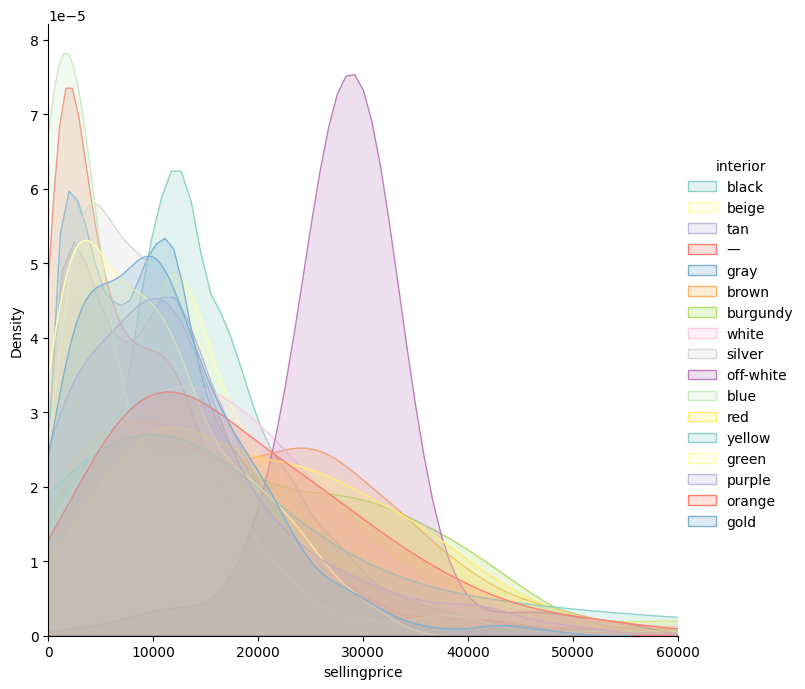

In [102]:
sns.FacetGrid(data = df,
              hue = "interior",
              height = 7,
              xlim = (0, 60000), palette="Set3").map(sns.kdeplot, "sellingprice", fill = True).add_legend()

>**Boxplots (also called box-and-whisker plots) show:**
>
>1. Median (middle line)
>2. Q1 and Q3 quartiles (box edges)
>3. Whiskers (typically 1.5 IQR)
>4. Outliers (individual points)
>
>**The plot was made shows:**
>
>- Price distribution of Porsche vehicles
>- Grouped by interior type
>- Helps identify price outliers
>- Shows price spread/variation

<Axes: xlabel='make', ylabel='sellingprice'>

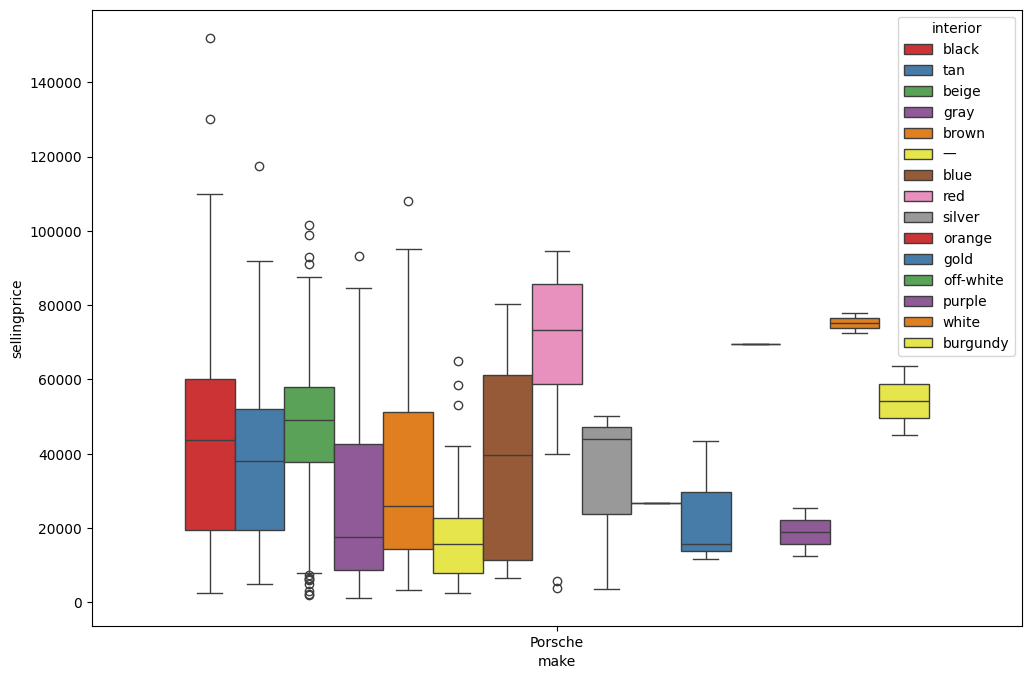

In [103]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = df_filled[df_filled['make'].isin(["Porsche"])],
            x = "make",
            y = "sellingprice",
            hue = "interior",
            palette = "Set1")

>Scatter plot show that mmr and selling prices are almost the same price. Nearly there is a line straight line in the plot. We can say these attributes are correlated. 

>And of course there is a huge domination of automatic transmission in the market.

<Axes: xlabel='sellingprice', ylabel='mmr'>

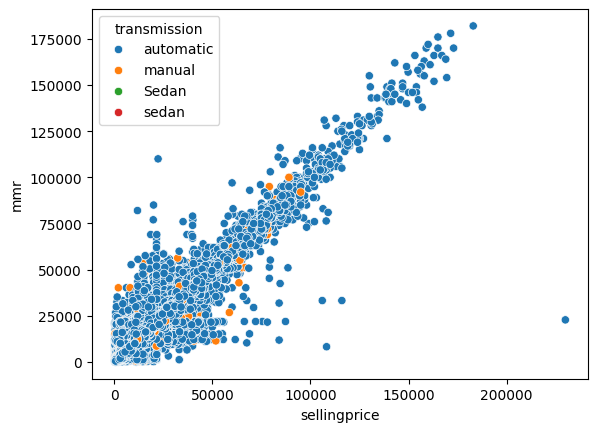

In [104]:
sns.scatterplot(data = df_filled,
                x = "sellingprice",
                y = "mmr",
                hue = "transmission")

### Outlier Analysis

>Outliers are data points that differ significantly from other observations in a dataset. They can occur due to variability in the data or experimental errors. Outliers are important for several reasons:
>- **Impact on Statistical Analysis**: Outliers can skew the results of statistical analyses, such as mean and standard deviation, leading to misleading conclusions.
>- **Data Quality**: Identifying outliers can help in detecting errors or anomalies in data collection and entry processes.
>
>Detecting and handling outliers is a crucial step in data analysis to ensure the reliability and accuracy of data analysis and modeling.

>Let us have a closer look to `sellingprice` and `condition` attributes with sketching a boxplot.
>
>Looks like seelingprice column has a lot of outliers. But on the other side condition has no outlier. That means attributes must be evaluated seperately. 

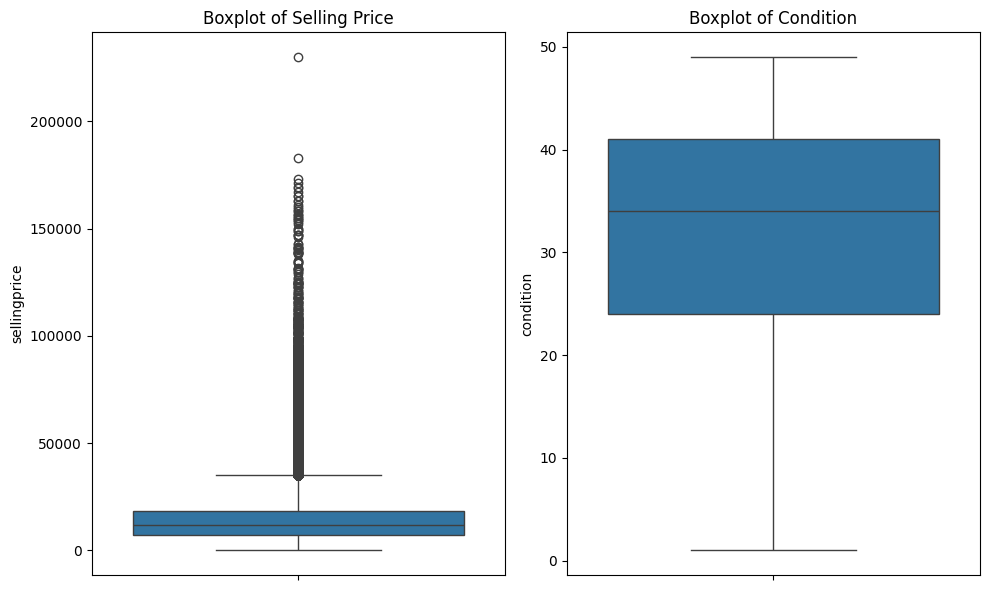

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(data=df_filled, y='sellingprice', ax=axes[0], orient='v')
axes[0].set_title('Boxplot of Selling Price')

sns.boxplot(data=df_filled, y='condition', ax=axes[1], orient='v')
axes[1].set_title('Boxplot of Condition')

plt.tight_layout()
plt.show()

>These are the values are useful to find outliers by doing math. 25th percentile, 75th percentile, intequartile range, lower fence and upper fence. The values higher than upper fence and lower than lower fence are generally considered as outliers.

In [106]:
# Find the 25th percentile and 75th percentile values
Q1 = df_filled[numerical_columns].quantile(0.25)
Q3 = df_filled[numerical_columns].quantile(0.75)

# Calculate the interquartile range
IQR = Q3-Q1

# Calculate the lower and upper fences
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

print("Numerical columns:    ", numerical_columns)
print("25th percentile value:", list(Q1))
print("75th percentile value:", list(Q3))
print("Interquartile range:  ", list(IQR))
print("Lower fence:          ", list(lower_fence))
print("Upper fence:          ", list(upper_fence))

Numerical columns:     ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
25th percentile value: [2008.0, 24.0, 28577.0, 7175.0, 7000.0]
75th percentile value: [2013.0, 41.0, 98559.0, 18300.0, 18200.0]
Interquartile range:   [5.0, 17.0, 69982.0, 11125.0, 11200.0]
Lower fence:           [2000.5, -1.5, -76396.0, -9512.5, -9800.0]
Upper fence:           [2020.5, 66.5, 203532.0, 34987.5, 35000.0]


>There are some outliers that cannot be ignored. Firstly it will be tried to remove outlier instances and will see what is the effects.

In [107]:
def outlier_info(df_to_lookup):
    for col in numerical_columns:
        # Identify outliers
        outliers = df_to_lookup[(df_to_lookup[col] < lower_fence[col]) | (df_to_lookup[col] > upper_fence[col])]
        print(f"Column: {col}\nNumber of outliers: {outliers.shape[0]}")
        print(f"Percentage: {outliers.shape[0] / df_to_lookup.shape[0] * 100:.2f}%\n")

outlier_info(df_filled)


Column: year
Number of outliers: 14465
Percentage: 2.59%

Column: condition
Number of outliers: 0
Percentage: 0.00%

Column: odometer
Number of outliers: 10732
Percentage: 1.92%

Column: mmr
Number of outliers: 16537
Percentage: 2.96%

Column: sellingprice
Number of outliers: 16276
Percentage: 2.92%



In [108]:
# Remove outliers
df_filled_no_outlier = df_filled[~((df_filled[numerical_columns] < lower_fence) | (df_filled[numerical_columns] > upper_fence)).any(axis=1)]

>The data we lose is corresponded to %7.22. This number can be accepted so the first attempt to deal with the outliers was selected.

In [109]:
print(f"Lost data percentage after removing outliers: {100 - df_filled_no_outlier.shape[0] / df_filled.shape[0] * 100:.2f}%")
print(f"Number of rows after removing outliers: {df_filled_no_outlier.shape[0]}")

Lost data percentage after removing outliers: 7.22%
Number of rows after removing outliers: 517587


>As the output says no longer there is an outliers in the data.

In [110]:
outlier_info(df_filled_no_outlier)

Column: year
Number of outliers: 0
Percentage: 0.00%

Column: condition
Number of outliers: 0
Percentage: 0.00%

Column: odometer
Number of outliers: 0
Percentage: 0.00%

Column: mmr
Number of outliers: 0
Percentage: 0.00%

Column: sellingprice
Number of outliers: 0
Percentage: 0.00%



>When the all numerical attributes of dataframes (data_filled and df_filled_no_outlier) it is clearly seen that there is almost no change in the distribution of classes. And that means the method for outliers was implemented suits well on the dataset.

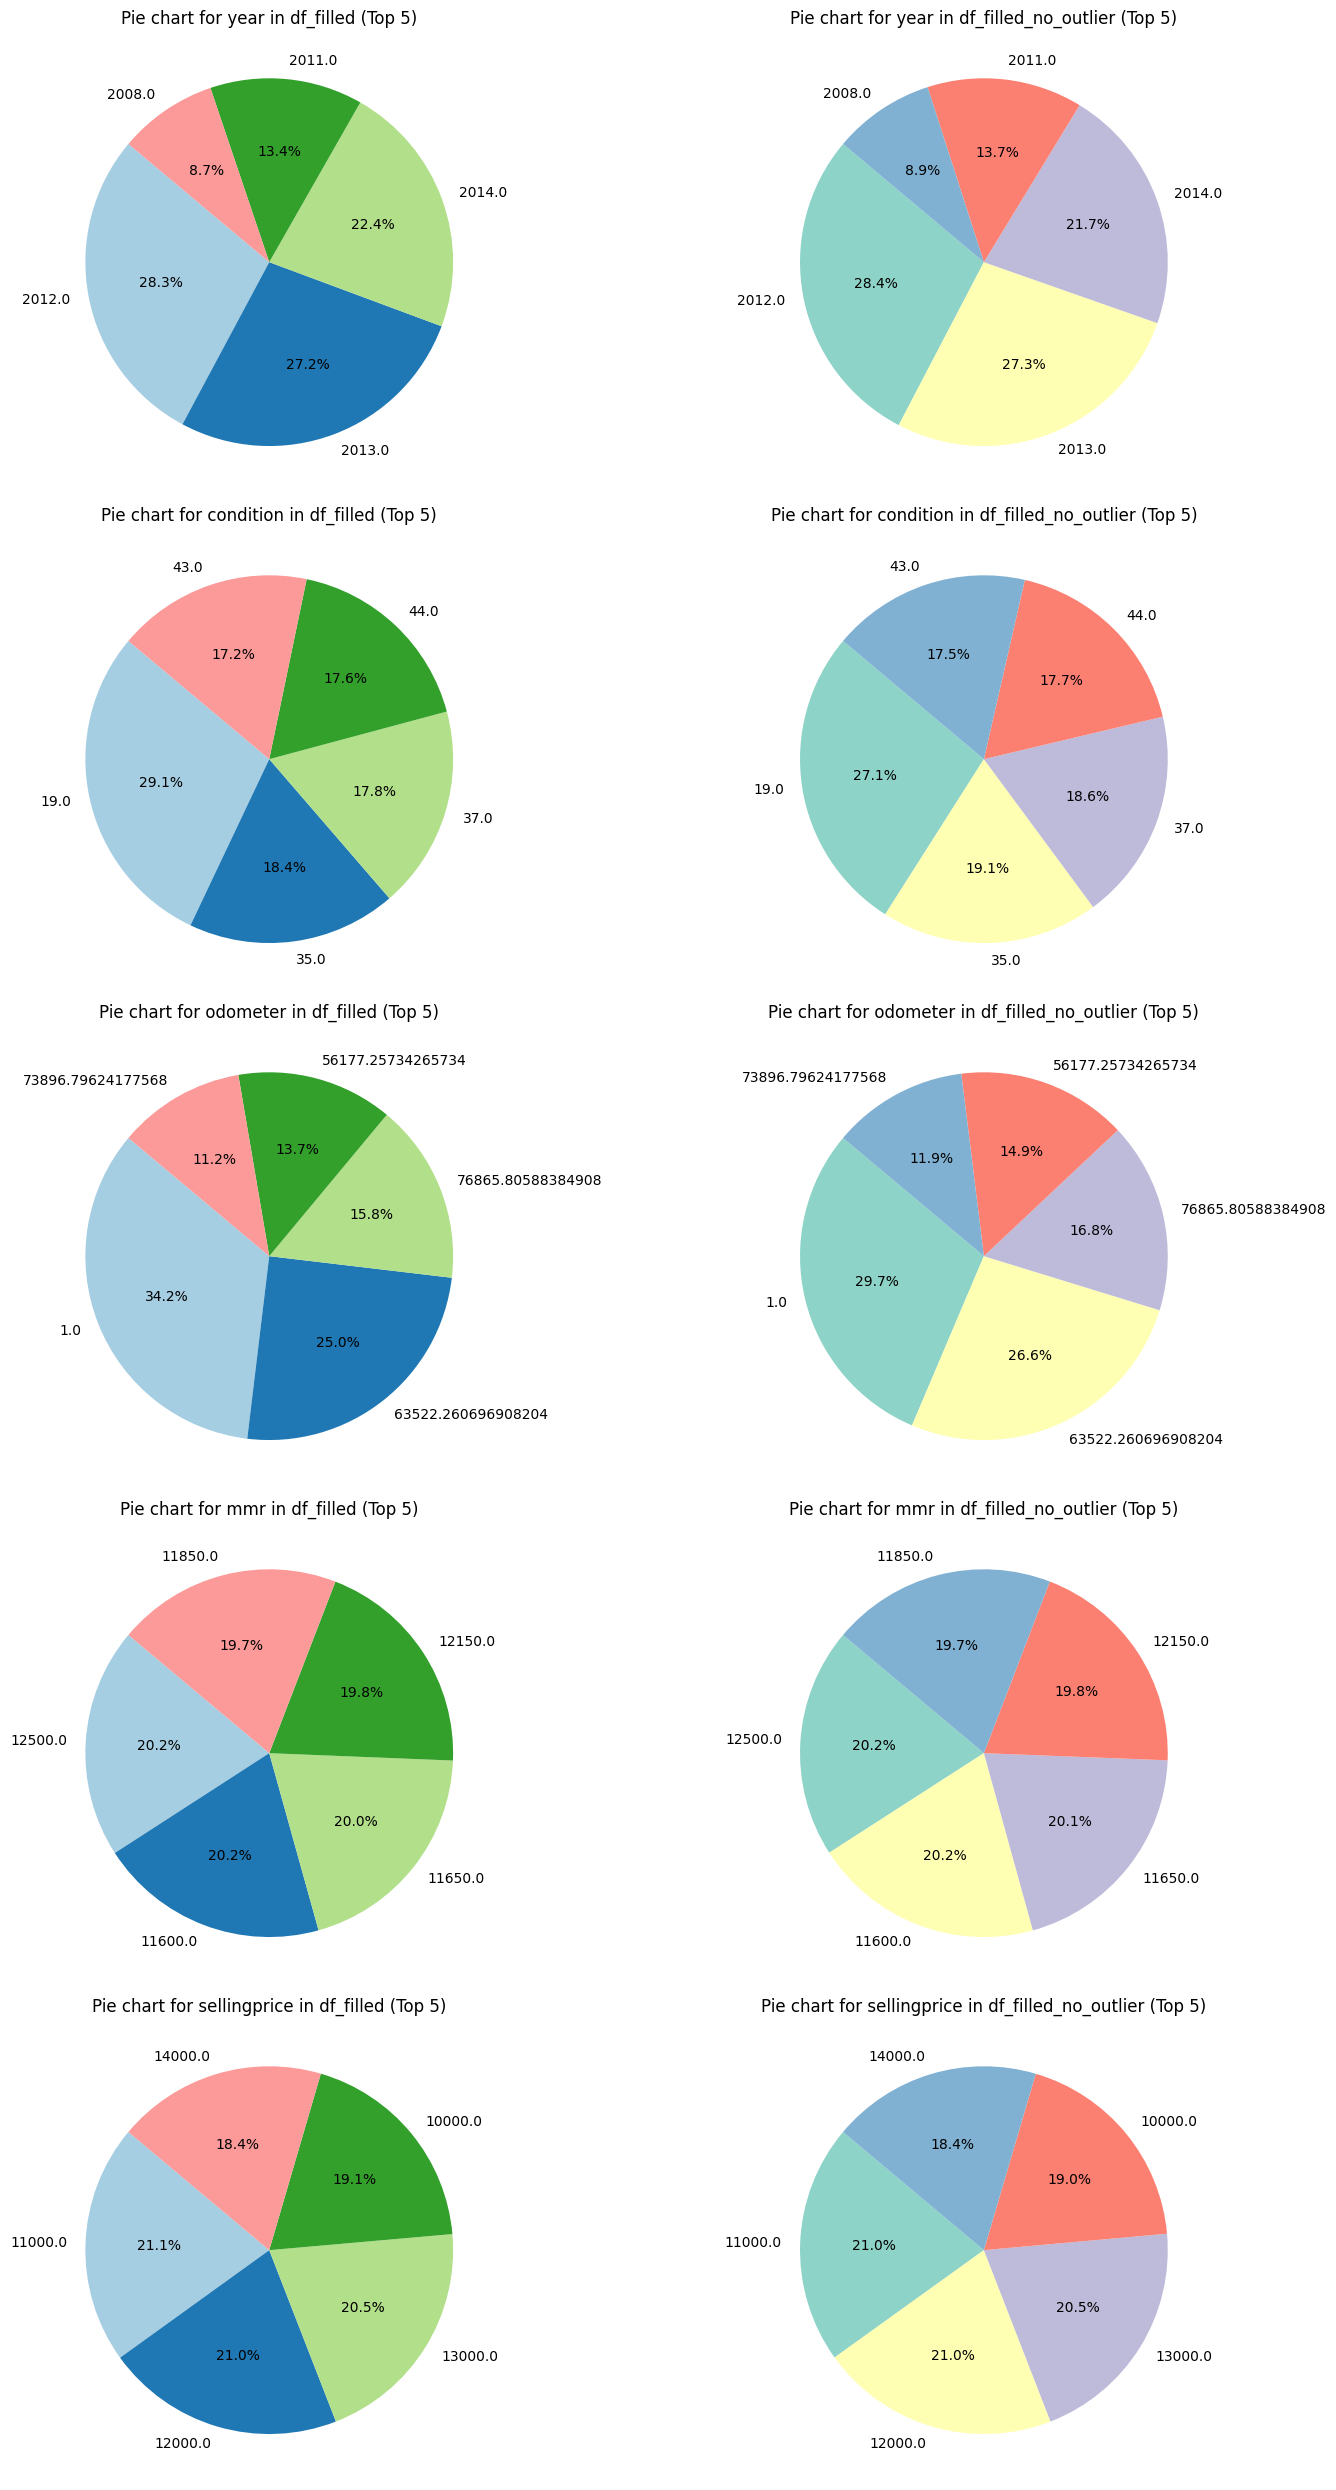

In [111]:
# Create a figure with multiple subplots - one for each numerical column in df_filled and df_filled_no_outlier
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, len(numerical_columns) * 5))

# Plot pie charts for numerical columns in df_filled
for i, col in enumerate(numerical_columns):
    # Calculate the percentage of each unique value
    value_counts = df_filled[col].value_counts(normalize=True).nlargest(5) * 100
    # Plot the pie chart
    axes[i, 0].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired"))
    axes[i, 0].set_title(f'Pie chart for {col} in df_filled (Top 5)')

# Plot pie charts for numerical columns in df_filled_no_outlier
for i, col in enumerate(numerical_columns):
    # Calculate the percentage of each unique value
    value_counts = df_filled_no_outlier[col].value_counts(normalize=True).nlargest(5) * 100
    # Plot the pie chart
    axes[i, 1].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
    axes[i, 1].set_title(f'Pie chart for {col} in df_filled_no_outlier (Top 5)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Feature Selection and Feature Engineering

>First of all let us have look the dataset again. In the first glance `vin` attribute seems unnecessary because it is a unique attribute and it gives nothing special about the car - especially when the data is going to be used in machine learning models. Also `saledate` is a bit unuseful, too. There is already a `year` attribute. That is why no need a duplicate. Might this question be arised: what about date and time information in `saledate` column? Well, these informations are tend to give not much special info about the car so they can be ignored. And lastly, other attributes seem normal and could be useful for machine learning models.

In [112]:
df_filled_no_outlier.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.000000,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015.0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.000000,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.000000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015.0,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,11484.678176,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015.0,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.000000,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)


In [113]:
# Remove vin and saledate columns
df_cleaned = df_filled_no_outlier.drop(columns=['vin', 'saledate'])

In [114]:
df_cleaned.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.000000
1,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.000000
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.000000
3,2015.0,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,11484.678176
5,2015.0,Nissan,Altima,2.5 S,Sedan,automatic,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.000000


>Feature generation in data mining is a sophisticated process of creating new, meaningful features from existing data to enhance machine learning model performance. This involves transforming raw data through mathematical derivations, domain-specific techniques, and advanced methods like scaling, encoding, interaction term creation, and statistical transformations. In our data we can simply generate a `mmr_sellingprice` attribute with dividing `mmr` column by `sellingprice` column. This gives a sort of index that can be useful for machine learning.

In [115]:
# Add a new column for the ratio of mmr to selling price
df_cleaned['mmr_sellingprice'] = df_cleaned['mmr'] / df_cleaned['sellingprice']
df_cleaned.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,mmr_sellingprice
0,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.000000,0.953488
1,2015.0,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.000000,0.967442
2,2014.0,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.000000,1.063333
3,2015.0,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,11484.678176,2.394495
5,2015.0,Nissan,Altima,2.5 S,Sedan,automatic,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.000000,1.408257


>Categorical attributes are meaningless for the machine learning models. They only understands numbers. So categorical columns must be converted to numbers somehow. There are lots of techniques for this topic. Here one-hot encoding and frequency encoding will be used.

>Let us remember the unique values.
>
>Only `transmission` attribute is suitable for one-hot encoding. Others will cause curse of dimensionality.

In [116]:
categorical_columns_cleaned = df_cleaned.select_dtypes(include=['object']).columns.tolist() 
for col in categorical_columns_cleaned:
    print(f'There are {df_cleaned[col].nunique()} unique values in "{col}" categorical feature.')

There are 77 unique values in "make" categorical feature.
There are 808 unique values in "model" categorical feature.
There are 1600 unique values in "trim" categorical feature.
There are 82 unique values in "body" categorical feature.
There are 4 unique values in "transmission" categorical feature.
There are 64 unique values in "state" categorical feature.
There are 46 unique values in "color" categorical feature.
There are 17 unique values in "interior" categorical feature.
There are 13426 unique values in "seller" categorical feature.


>Sedan and sedan are the same thing. No need for seperating it so let us fix the sedans with capital s(S).

In [117]:
list(df_cleaned["transmission"].unique())

['automatic', 'manual', 'Sedan', 'sedan']

In [118]:
# Replace 'Sedan' with 'sedan' in the 'transmission' column
df_cleaned['transmission'] = df_cleaned['transmission'].replace('Sedan', 'sedan')

# Verify the changes
print(df_cleaned['transmission'].unique())

['automatic' 'manual' 'sedan']


>Now we can apply one-hot encoding to `transmission` attribute.

In [119]:
# Apply one-hot encoding to the 'transmission' column
df_encoded = pd.get_dummies(df_cleaned, columns=['transmission'], prefix='transmission')

df_encoded.head()

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,mmr_sellingprice,transmission_automatic,transmission_manual,transmission_sedan
0,2015.0,Kia,Sorento,LX,SUV,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.000000,0.953488,True,False,False
1,2015.0,Kia,Sorento,LX,SUV,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.000000,0.967442,True,False,False
2,2014.0,BMW,3 Series,328i SULEV,Sedan,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.000000,1.063333,True,False,False
3,2015.0,Volvo,S60,T5,Sedan,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,11484.678176,2.394495,True,False,False
5,2015.0,Nissan,Altima,2.5 S,Sedan,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.000000,1.408257,True,False,False


>Now for the remaining categorical columns apply frequency encoding.
>
>Doing this technique makes column values normalized as well. Further, normalization will be applied to the numberical values in the next step.

In [120]:
# Apply frequency encoding to the remaining categorical columns
for col in categorical_columns_cleaned:
    if col != 'transmission':  # Skip 'transmission' as it is already one-hot encoded
        freq_encoding = df_encoded[col].value_counts() / len(df_encoded)
        df_encoded[col] = df_encoded[col].map(freq_encoding)

df_encoded.head()

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,mmr_sellingprice,transmission_automatic,transmission_manual,transmission_sedan
0,2015.0,0.034325,0.006478,0.037702,0.209375,0.126419,5.0,16639.0,0.186813,0.452463,0.008404,20500.0,21500.000000,0.953488,True,False,False
1,2015.0,0.034325,0.006478,0.037702,0.209375,0.126419,5.0,9393.0,0.186813,0.104427,0.008404,20800.0,21500.000000,0.967442,True,False,False
2,2014.0,0.031655,0.014297,0.000044,0.388184,0.126419,45.0,1331.0,0.150093,0.452463,0.008439,31900.0,30000.000000,1.063333,True,False,False
3,2015.0,0.006718,0.002164,0.001694,0.388184,0.126419,41.0,14282.0,0.186813,0.452463,0.000951,27500.0,11484.678176,2.394495,True,False,False
5,2015.0,0.100847,0.060384,0.021326,0.388184,0.126419,1.0,5554.0,0.150093,0.452463,0.005657,15350.0,10900.000000,1.408257,True,False,False


>To help ML models to understand the data clearly let us apply 0-1 normalization to the numerical columns.

In [121]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler to the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

df_encoded.head()

,year,make,model,trim,body,state,condition,odometer,color,interior,seller,mmr,sellingprice,mmr_sellingprice,transmission_automatic,transmission_manual,transmission_sedan
0,1.000000,0.034325,0.006478,0.037702,0.209375,0.126419,0.083333,0.081748,0.186813,0.452463,0.008404,0.587097,0.614275,0.953488,True,False,False
1,1.000000,0.034325,0.006478,0.037702,0.209375,0.126419,0.083333,0.046146,0.186813,0.104427,0.008404,0.595699,0.614275,0.967442,True,False,False
2,0.930629,0.031655,0.014297,0.000044,0.388184,0.126419,0.916667,0.006535,0.150093,0.452463,0.008439,0.913978,0.857139,1.063333,True,False,False
3,1.000000,0.006718,0.002164,0.001694,0.388184,0.126419,0.833333,0.070167,0.186813,0.452463,0.000951,0.787814,0.328114,2.394495,True,False,False
5,1.000000,0.100847,0.060384,0.021326,0.388184,0.126419,0.000000,0.027284,0.150093,0.452463,0.005657,0.439427,0.311409,1.408257,True,False,False


# Result and Discussion

>After applying these methods to the dataset, it is now ready to use machine learning purposes or something related to it.

#### Example Use Case for This Project's Output

>Scenario: Predicting Vehicle Selling Prices for a Car Dealership
>
>##### Background
>A car dealership wants to optimize its pricing strategy to maximize profits while remaining competitive in the market. The dealership has a large dataset containing detailed information about past vehicle sales, including attributes such as make, model, year, condition, odometer reading, and selling price. By analyzing this dataset, the dealership aims to develop a predictive model that can accurately estimate the selling price of vehicles based on their features.
>
>##### Expected Outcomes
>- A comprehensive understanding of the factors influencing vehicle selling prices.
>- A robust predictive model that can estimate vehicle prices with high accuracy.
>- Improved pricing strategy leading to increased profitability and competitiveness for the dealership.


#### Future Works

>1. **Model Selection and Training**:
>    - Choose appropriate machine learning models (e.g., Linear Regression, Decision Trees, Random Forest, Gradient Boosting, etc.).
>    - If your target feature is numerical consider using Random Forest Regressor if your target is numerical for its ability to handle large datasets and capture complex interactions between features.
>    - Split the dataset into training and testing sets.
>    - Train the models using the training set.
>
>2. **Model Evaluation**:
>    - Evaluate the performance of the models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), R-squared, etc.
>    - Use cross-validation to ensure the model's robustness.
>
>3. **Hyperparameter Tuning**:
>    - Perform hyperparameter tuning using techniques like Grid Search or Random Search to optimize the model's performance.
>
>4. **Feature Importance**:
>    - Analyze feature importance to understand which features contribute the most to the model's predictions.
>    - Consider removing less important features to simplify the model.
>
>5. **Model Interpretation**:
>    - Use techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret the model's predictions.
>
>6. **Deployment**:
>    - Once the model is trained and evaluated, deploy it to a production environment.
>    - Create an API or a web application to make predictions on new data.
>
>7. **Monitoring and Maintenance**:
>    - Continuously monitor the model's performance in the production environment.
>    - Retrain the model periodically with new data to maintain its accuracy.
>
>8. **Documentation**:
>    - Document the entire workflow, including data preprocessing steps, model selection, evaluation metrics, and deployment process.
>    - Ensure that the documentation is clear and comprehensive for future reference.
>
>These steps are personal recommendations. You can follow if you want to. After these steps, you can build a robust machine learning pipeline that can be used for predictive analytics on the vehicle sales dataset.